In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bert-new/fe_bert_stem2_2.csv


In [2]:
bert_df = pd.read_csv('/kaggle/input/bert-new/fe_bert_stem2_2.csv')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
bert_df.describe()

,Kelas,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
count,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,...,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000
mean,2.954449,-1.523871,1.319889,0.891742,1.066737,0.942645,0.385537,-0.247469,0.994530,0.199432,...,-1.057715,0.119347,-1.694076,-0.863914,-0.474218,-0.255878,-0.260999,0.983954,-0.518318,-0.746655
std,1.257924,0.539317,0.451074,0.407220,0.397396,0.388583,0.377297,0.404538,0.546337,0.309893,...,0.471654,0.393444,0.493166,0.628893,0.369637,0.338111,0.492879,0.689987,0.385657,0.404195
min,1.000000,-2.391732,-0.274622,-1.105955,-0.084735,-0.438538,-1.327094,-1.673213,-0.847028,-1.079964,...,-2.592487,-1.580506,-3.345976,-2.880670,-1.655628,-1.261389,-1.972416,-1.706492,-1.589157,-1.920878
25%,2.000000,-1.851600,1.049350,0.601511,0.749404,0.710662,0.135483,-0.451993,0.599425,0.025462,...,-1.332632,-0.098920,-1.961713,-1.291359,-0.788312,-0.449441,-0.650550,0.561571,-0.780235,-1.152916
50%,4.000000,-1.577703,1.291791,0.880296,1.032061,0.863619,0.415153,-0.300768,0.923789,0.161262,...,-1.046663,0.093540,-1.616203,-0.974360,-0.527085,-0.249741,-0.286696,0.983750,-0.547336,-0.720590
75%,4.000000,-1.246851,1.543094,1.171101,1.329941,1.155957,0.609560,-0.020961,1.533558,0.386256,...,-0.808715,0.342090,-1.401402,-0.515070,-0.218141,-0.117294,0.212214,1.518800,-0.278808,-0.485375
max,4.000000,1.607962,3.044112,2.367388,2.442353,2.733131,1.524098,1.994316,2.579772,1.375441,...,1.828876,1.916209,0.632955,0.296052,1.298273,1.493244,1.402591,2.217309,1.086553,1.378742


In [5]:
#c = bert_df['Kelas']
X = bert_df.drop('Kelas', axis=1)
X = X.drop('Text', axis=1)
X.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
0,-1.742539,1.319357,0.949083,1.194607,1.064591,0.271474,-0.117423,0.641722,0.261379,0.755921,...,-1.822169,0.269279,-2.106674,-0.936053,-0.437729,-0.322795,-0.430957,0.355015,-0.734874,-0.622970
1,-2.294133,1.291791,0.272923,0.563296,0.710662,0.595617,-0.345499,1.723081,0.025462,1.247300,...,-0.808715,0.093540,-1.401402,0.296052,-0.887320,-0.207943,0.294742,1.972161,-0.780235,-1.182248
2,-1.845356,1.981219,0.601140,0.594695,0.840374,0.257990,-0.059986,1.818484,0.077486,1.112509,...,-1.125922,-0.019212,-2.496985,-0.515070,-0.505180,-0.398307,0.139708,1.670183,-0.518351,-0.485375
3,-1.560574,1.981224,0.640977,1.013589,0.741580,-0.036166,-0.304491,1.669445,0.378134,0.849441,...,-1.093098,-0.018936,-2.705219,-0.850471,-0.527046,-0.189604,-0.175931,1.098098,-0.367513,-0.576332
4,-1.607411,1.039463,0.711083,0.975391,0.836444,0.694687,-0.152890,1.425531,-0.034328,0.780249,...,-0.876359,0.200177,-1.242542,-0.939372,-0.493214,-0.003860,-0.540401,1.738452,-0.565656,-0.919870


In [6]:
y = bert_df[['Kelas']]
y

,Kelas
0,1
1,1
2,1
3,1
4,1
...,...
3288,4
3289,4
3290,4
3291,4


In [7]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [8]:
# Define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='auto'))
X, y = resample.fit_resample(X, y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

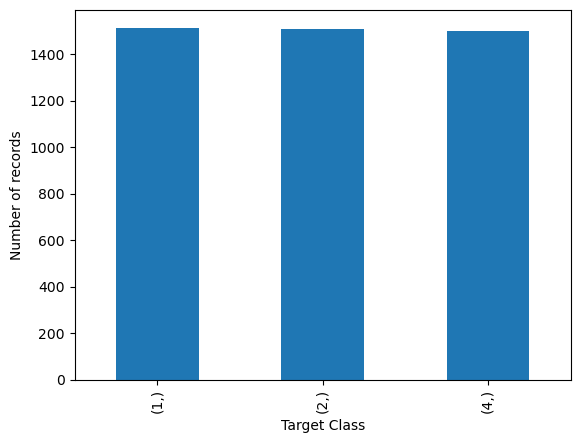

In [10]:
import matplotlib.pyplot as plt
count = y_train.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

In [11]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection

In [12]:
model = svm.SVC().fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


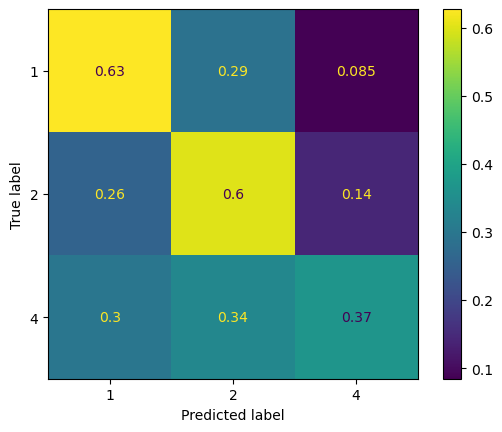

In [13]:
# model_svm.fit(X_train, y_train)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize='true')
plt.show()

In [14]:
model_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model_pred, digits=3))

              precision    recall  f1-score   support

           1      0.531     0.627     0.575       378
           2      0.487     0.601     0.538       373
           4      0.621     0.367     0.461       379

    accuracy                          0.531      1130
   macro avg      0.546     0.531     0.525      1130
weighted avg      0.547     0.531     0.525      1130



In [16]:
from sklearn.model_selection import GridSearchCV
model_svm = svm.SVC()

In [17]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    #'C': [100],
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    #'kernel' : ['rbf'],
    'decision_function_shape':['ovo', 'ovr'],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
}

In [18]:

grid_search = GridSearchCV(estimator=model_svm, param_grid=param_grid, cv=3)

grid_search.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [19]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

Best Parameters:  {'C': 100, 'decision_function_shape': 'ovo', 'gamma': 0.01, 'kernel': 'rbf'}
Best Score:  0.6952866848612335


In [20]:
final_linear_svm_model = svm.SVC(**best_params)


final_linear_svm_model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, decision_function_shape='ovo', gamma=0.01)

In [21]:
accuracy = final_linear_svm_model.score(X_test, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.7336283185840708


In [22]:
grid_search_predictions = grid_search.predict(X_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, grid_search_predictions))


print("Classification Report:")
print(classification_report(y_test, grid_search_predictions, digits=3))

Confusion Matrix:
[[276  85  17]
 [ 14 337  22]
 [ 53 110 216]]
Classification Report:
              precision    recall  f1-score   support

           1      0.805     0.730     0.766       378
           2      0.633     0.903     0.745       373
           4      0.847     0.570     0.681       379

    accuracy                          0.734      1130
   macro avg      0.762     0.735     0.731      1130
weighted avg      0.762     0.734     0.730      1130



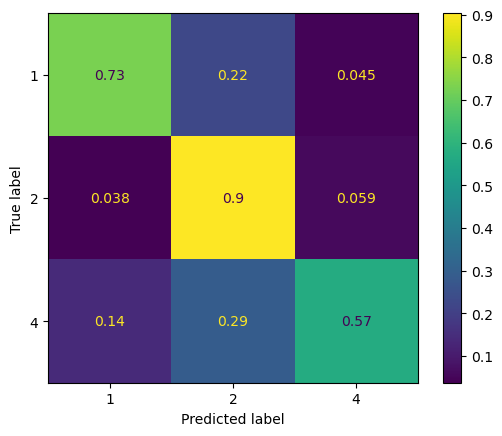

In [23]:
cm_display = ConfusionMatrixDisplay.from_estimator(final_linear_svm_model, X_test, y_test, normalize='true')